In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = (9, 5)

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import datetime
from dateutil.relativedelta import relativedelta
from arch import arch_model

p = print

In [6]:
# зафиксируем выборку
np.random.seed(1)

In [7]:
# функция mean absolute persentage error
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

# ARIMA (1, 0, 0)
alpha = 0.5 , p = 1, d = 0, q = 0

процесс сводится к процессу AR, используем arma_generate

In [61]:
AR1 = {} # словарь для хранения данных модели
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [62]:
alphas = np.array([.5]) # p = 1
betas = np.array([0.]) # q = 0
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [63]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ar процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    ar1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ar1,order=(1,0)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении alpha
    cff_prd.append(mdl.params[0])
    cff_mape.append(mape(np.ones(cnt)*0.5,cff_prd)) 
    #print(n, cff_mape[cnt-1])
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            #print()
            #print(cff_mape[cnt-1], min_mape, min_n, n)
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
    AR1[n] = ar1 
  
p()            
p('Min n={:1d}, при котором достигается mape alpha менее 5%'.format(min_n) )           

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



Min n=2200, при котором достигается mape alpha менее 5%


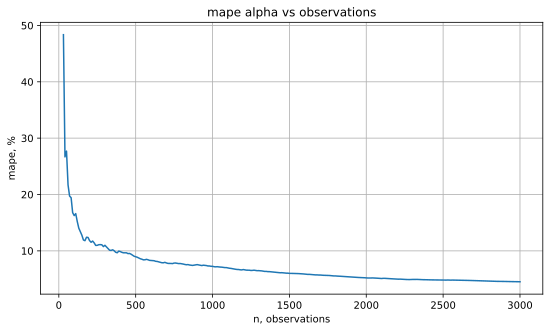

In [66]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha vs observations');

Min n=2200, при котором достигается mape alpha менее 5%, random_seed(1)

# ARIMA (0, 0, 1)
beta = 0.5 , p = 0, d = 0, q = 1

процесс сводится к процессу MA, используем arma_generate

In [72]:
cff_prd = [] # список для хранения коэффициентов n-ой модели
cff_mape = [] # писок для хранения mape n-ого шага
min_mape, min_n = 5.0, 0 # в описании 0,05, но в задании mean absolute persantage (!) 

In [73]:
alphas = np.array([0.]) # p = 0
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [74]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем

for i in range(30, 3001, 10):
    
    n = int(i)
    ma1 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(ma1[20:],order=(0,1)).fit(maxlag=20, ic='aic', trend='nc')        
    
    #считаем ошибку в определении beta

    cff_prd.append(mdl.params[0])
    cff_mape.append(mape(np.ones(cnt)*0.5,cff_prd)) 
    if min_n == 0:
        if cff_mape[cnt-1] <= min_mape:
            min_n = n
            
    cnt+=1 # для увеличения размерности true матрицы alphas     
  
p()            
p('Min n={:1d}, при котором достигается mape beta менее 5%'.format(min_n) ) 

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):



Min n=2790, при котором достигается mape beta менее 5%


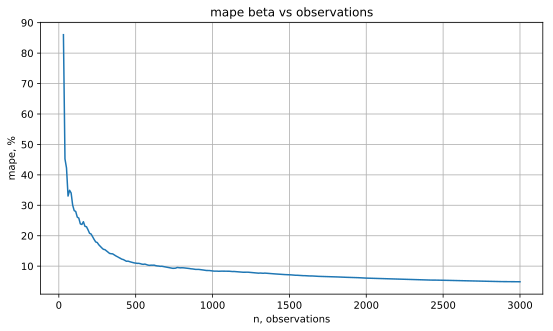

In [75]:
plt.plot(np.array(range(30, 3001, 10)),cff_mape)
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape beta vs observations');

Min n=2790, при котором достигается mape beta менее 5%

# ARIMA (1, 0, 1)

alpha = 0.5, beta = 0.5 , p = 1, d = 0, q = 1

In [49]:
cff_prd_a, cff_prd_b = [], [] # список для хранения коэффициентов n-ой модели
cff_mape_a, cff_mape_b = [], [] # писок для хранения mape n-ого шага
min_mape, min_n_a, min_n_b = 5.0, 0, 0 # в описании 0,05, но в задании mean absolute persantage (!)

In [50]:
alphas = np.array([0.5]) # p = 1
betas = np.array([0.5]) # q = 1
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]
cnt = 1 # шаг генерации

In [51]:
# генерируем выборку от N = 30 до 3000 точек, генерируем ma процесс, все данные сохраняем
# визуальный осмотр вектора mape показал, что порог 5% не достигается при кол-ве точек 3000,  
# поэтому увеличила n до 4500

for i in range(30, 4501, 10):
    
    n = int(i)
    arma11 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=20)
    mdl = smt.ARMA(arma11,order=(1,1)).fit(maxlag=20, ic='aic', trend='nc')
    
    #считаем ошибку в определении alpha    
    cff_prd_a.append(mdl.params[0])
    cff_mape_a.append(mape(np.ones(cnt)*0.5,cff_prd_a)) 
#    print(n, cff_mape_a[cnt-1])

    if min_n_a == 0:
        if cff_mape_a[cnt-1] <= min_mape:
            min_n_a = n            
            
    #считаем ошибку в определении alpha    
    cff_prd_b.append(mdl.params[1])
    cff_mape_b.append(mape(np.ones(cnt)*0.5,cff_prd_b)) 
#    print(n, cff_mape_b[cnt-1])
    if min_n_b == 0:
        if cff_mape_b[cnt-1] <= min_mape:
            min_n_b = n
    
    cnt+=1 # для увеличения размерности true матрицы alphas     
  
p()
print('Min n {:1d} aplpha, min n {:1d} beta'.format(min_n_a, min_n_b))
p('Min n={:1d}, при котором достигается mape alpha и beta менее 5%'.format(max(min_n_a, min_n_b)) ) 

C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\blacat\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):



Min n 3910 aplpha, min n 3610 beta
Min n=3910, при котором достигается mape alpha и beta менее 5%


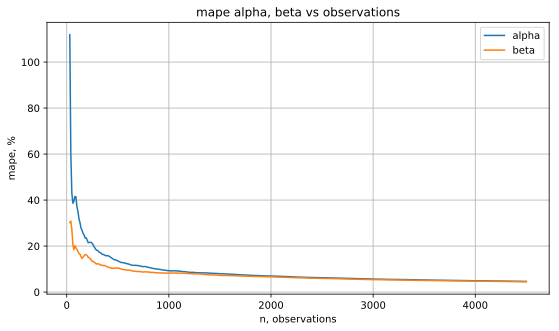

In [67]:
plt.plot(np.array(range(30, 4501, 10)),cff_mape_a, label = 'alpha')
plt.plot(np.array(range(30, 4501, 10)),cff_mape_b, label = 'beta')
plt.legend(loc='upper right')
plt.xlabel('n, observations')
plt.ylabel('mape, %')
plt.grid()
plt.title('mape alpha, beta vs observations')
plt.show()